Check which conda environment you are in:

In [1]:
!which python

Auto-reload python scripts:

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizations Draft Page 
#### - Sam

To view source code for this page, visit our repo @ https://github.com/sam-thurman/dsc-mod-1-project-seattle-ds and navigate to `src/viz_scripts/numeric_visualizations.py`

Import packages:

In [70]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data import data_collection

import pandas as pd
import seaborn as sns

Import scripts and extract variables:

In [62]:
import src.viz_scripts.numeric_visualization as viz

In [63]:
# viz.import_and_assign()

In [64]:
df_master_dict = viz.import_and_assign()

In [65]:
oy_by_puma = df_master_dict['oy_by_puma']

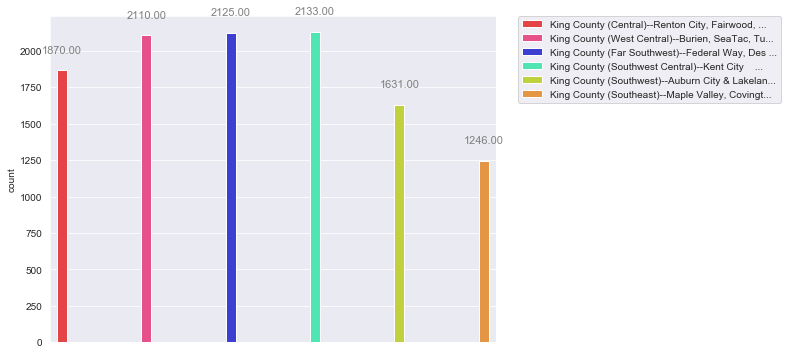

In [80]:
viz.plot_oy_by_puma(oy_by_puma)

## VIZ:
#### OY by Age

Gather required variables:

In [8]:
age_df_dict = df_master_dict['age_df_dict']
ay_age_group_val_list, oy_age_group_val_list, oy_percentage_of_age_pop, age_group_strings = viz.get_age_plot_reqs(age_df_dict)

Plot just percent:

In [26]:
oy_percentage_of_age_pop

[6.021698019309246, 16.020560307619867, 17.242860920148072]

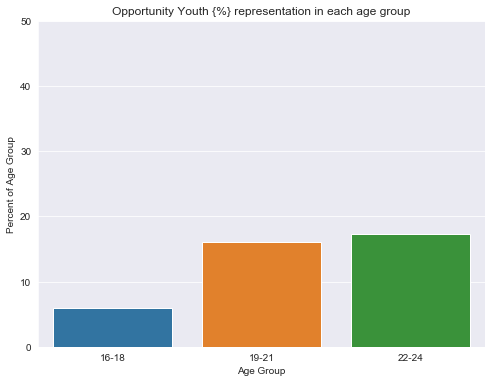

In [33]:
viz.plot_percent_oy_by_age(oy_percentage_of_age_pop, age_group_strings)

## VIZ:
#### OY Age Breakdown

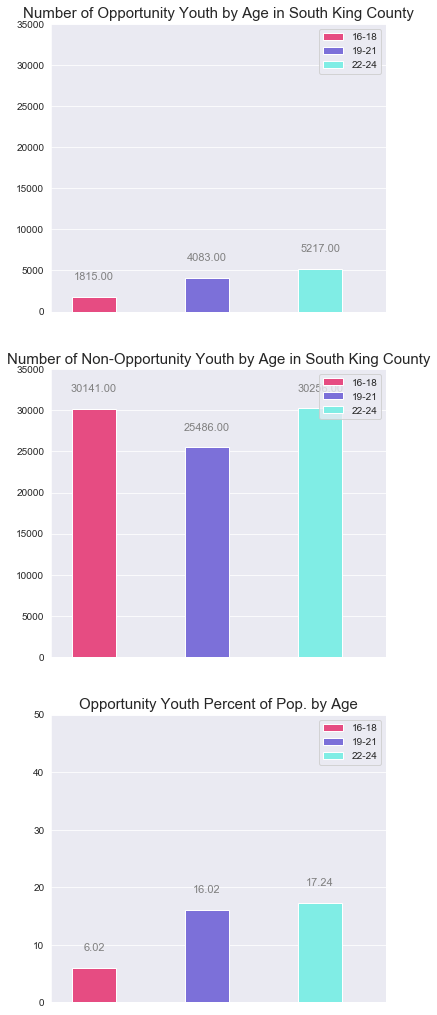

In [86]:
viz.plot_in_depth_age(age_df_dict)

## VIZ:
#### OY by Race

In [11]:
racial_df = df_master_dict['racial_df']

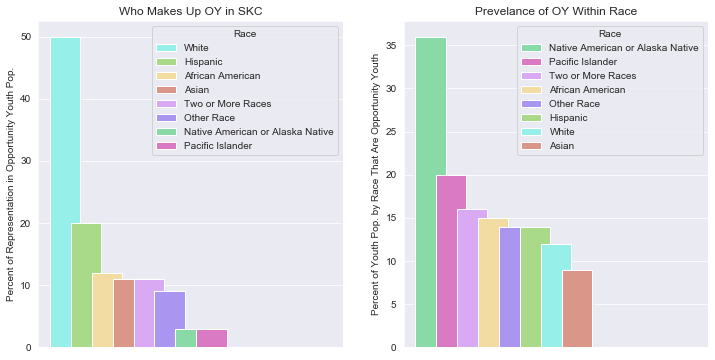

In [12]:
viz.plot_racial_representation(racial_df)

## VIZ:
#### total pop. diploma/work status by age

In [13]:
oy_by_age_df = df_master_dict['oy_by_age_df']

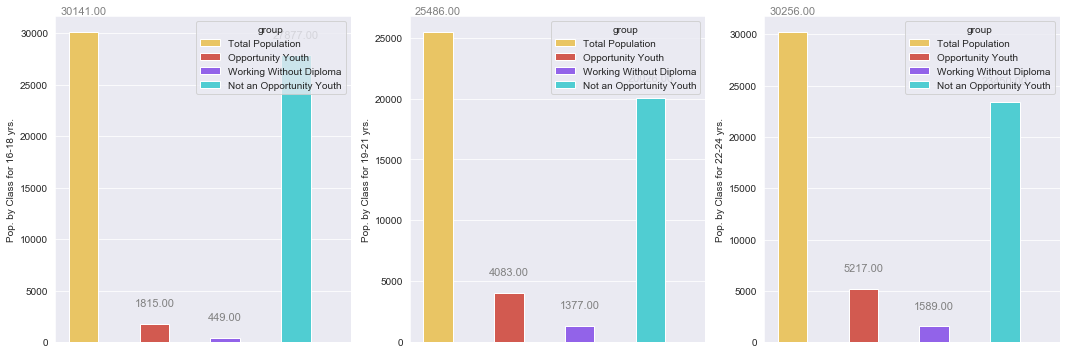

In [14]:
viz.plot_working_diploma_status(oy_by_age_df)

## VIZ: 
#### OY in 2016 vs. 2020

In [15]:
oy_by_education = df_master_dict['oy_by_education']

In [16]:
oy_by_education_2016 = df_master_dict['oy_by_education_2016']

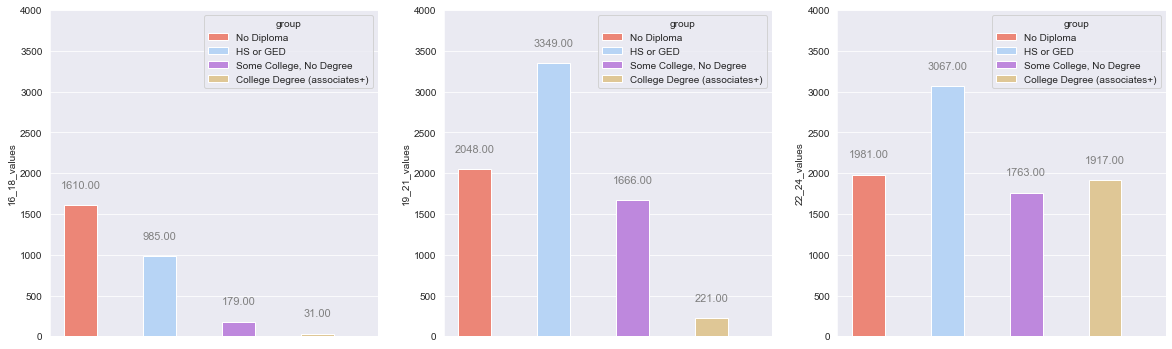

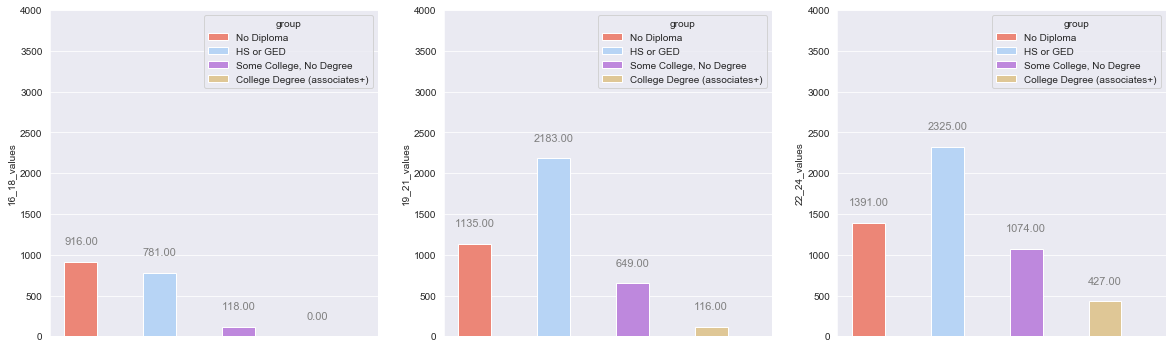

In [17]:
viz.plot_oy_education_breakdown_2016(oy_by_education_2016)
viz.plot_oy_education_breakdown_2020(oy_by_education)

In [18]:
full_dfs = df_master_dict['full_dfs']

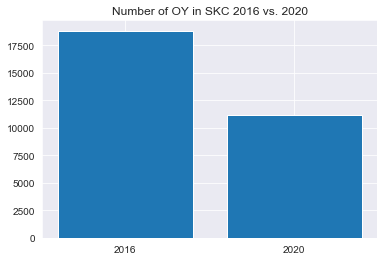

In [19]:
viz.plot_16_v_20(full_dfs)